In [2]:
# Import pandas library
import pandas as pd

# Load your CSV file (correct file name here!)
df = pd.read_csv('/content/2014-2015-doe-high-school-directory.csv')

# Preview the first 5 rows
df.head()


,dbn,school_name,borough,building_code,phone_number,fax_number,grade_span_min,grade_span_max,expgrade_span_min,expgrade_span_max,...,Council District,Census Tract,BIN,BBL,NTA,Zip Codes,Community Districts,Borough Boundaries,City Council Districts,Police Precincts
0,27Q260,Frederick Douglass Academy VI High School,Queens,Q465,718-471-2154,718-471-2890,9.0,12,NaN,NaN,...,31.0,100802.0,4300730.0,4.157360e+09,Far Rockaway-Bayswater ...,20529.0,51,3,47,59
1,21K559,Life Academy High School for Film and Music,Brooklyn,K400,718-333-7750,718-333-7775,9.0,12,NaN,NaN,...,47.0,306.0,3186454.0,3.068830e+09,Gravesend ...,17616.0,21,2,45,35
2,16K393,Frederick Douglass Academy IV Secondary School,Brooklyn,K026,718-574-2820,718-574-2821,9.0,12,NaN,NaN,...,36.0,291.0,3393805.0,3.016160e+09,Stuyvesant Heights ...,18181.0,69,2,49,52
3,08X305,Pablo Neruda Academy,Bronx,X450,718-824-1682,718-824-1663,9.0,12,NaN,NaN,...,18.0,16.0,2022205.0,2.036040e+09,Soundview-Castle Hill-Clason Point-Harding Par...,11611.0,58,5,31,26
4,03M485,Fiorello H. LaGuardia High School of Music & A...,Manhattan,M485,212-496-0700,212-724-5748,9.0,12,NaN,NaN,...,6.0,151.0,1030341.0,1.011560e+09,Lincoln Square ...,12420.0,20,4,19,12


In [3]:
# Clean column names for easier access
df.columns = df.columns.str.lower().str.replace(' ', '_').str.replace(r'\W', '', regex=True)

# Show the cleaned column names
df.columns


Index(['dbn', 'school_name', 'borough', 'building_code', 'phone_number',
       'fax_number', 'grade_span_min', 'grade_span_max', 'expgrade_span_min',
       'expgrade_span_max', 'bus', 'subway', 'primary_address_line_1', 'city',
       'state_code', 'postcode', 'website', 'total_students', 'campus_name',
       'school_type', 'overview_paragraph', 'program_highlights',
       'language_classes', 'advancedplacement_courses', 'online_ap_courses',
       'online_language_courses', 'extracurricular_activities',
       'psal_sports_boys', 'psal_sports_girls', 'psal_sports_coed',
       'school_sports', 'partner_cbo', 'partner_hospital', 'partner_highered',
       'partner_cultural', 'partner_nonprofit', 'partner_corporate',
       'partner_financial', 'partner_other', 'addtl_info1', 'addtl_info2',
       'start_time', 'end_time', 'se_services', 'ell_programs',
       'school_accessibility_description', 'number_programs', 'priority01',
       'priority02', 'priority03', 'priority04', 'prior

In [4]:
# Count number of schools in each borough
df['borough'].value_counts()


,count
borough,
Brooklyn,121
Bronx,118
Manhattan,106
Queens,80
Staten Island,10


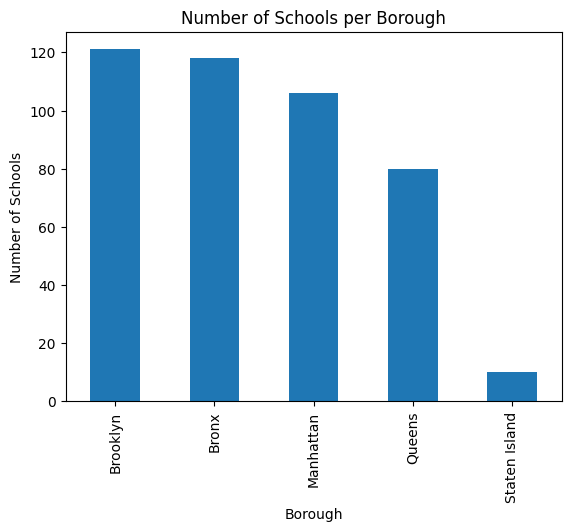

In [5]:
import matplotlib.pyplot as plt

# Create a bar chart of school counts by borough
df['borough'].value_counts().plot(kind='bar', title='Number of Schools per Borough')
plt.xlabel('Borough')
plt.ylabel('Number of Schools')
plt.show()


Observations:
- Most schools are located in Brooklyn and Manhattan.
- The dataset seems clean but some columns have missing values.
